In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
#Read COPD Gene spreadsheet and get an idea of cases versus controls versus unknowns (clean the spreadsheet)
copd = pd.read_excel("/fs5/p_masi/krishar1/COPDGENE/COPD-gene-progress.xlsx")
copd.head()

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,Control,2,DS-CS,no,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,no,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,no,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0


In [3]:
#Observe the dataset
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,Control,2,DS-CS,no,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,no,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,no,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,control,1,HMB,no,tar,COPDGene_W67783_COPDGene_W67783.tar,phs000179,0,CT,d1984409,European-American,male,1200496640,NaN
12099,chest,Control,1,HMB,no,tar,COPDGene_Q19809.tar.gz,phs000179,GOLD_0_Control,CT,d1992305,Caucasian,female,529506641,1819.0
12100,chest,case,1,HMB,no,tar,COPDGene_D70993_COPDGene_D70993.tar,phs000179,3,CT,d1979500,Caucasian,male,1129728000,NaN
12101,chest,Other,1,HMB,no,tar,COPDGene_C63452.tar.gz,phs000179,GOLD_1,CT,d1992576,Caucasian,male,1300595977,NaN


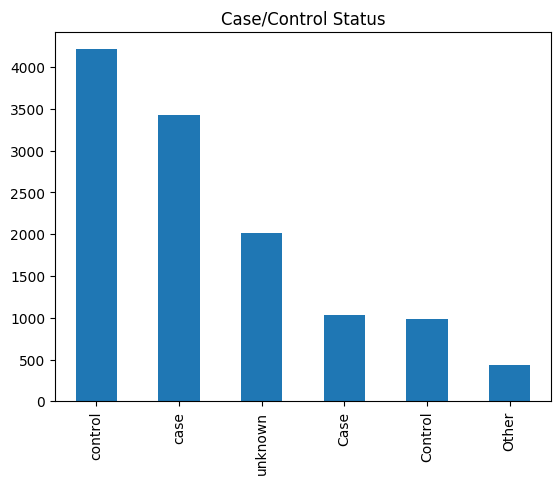

In [5]:
#Make a counpolot of Case/Control status.
copd['Case/control'].value_counts().plot(kind='bar')
plt.title('Case/Control Status')
plt.show()


In [8]:
copd.sort_values(by="File Name", inplace=True)
copd.reset_index(drop=True, inplace=True)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,Case,2,DS-CS,no,tar,COPDGene_A00282.tar.gz,phs000179,GOLD_3,CT,d1992781,Caucasian,female,535650641,NaN
1,chest,case,2,DS-CS,no,tar,COPDGene_A00282_COPDGene_A00282.tar,phs000179,3,CT,d1984662,Caucasian,female,1008240640,NaN
2,chest,Control,1,HMB,no,tar,COPDGene_A00444.tar.gz,phs000179,GOLD_0_Control,CT,d1990538,African,male,620153587,NaN
3,chest,control,1,HMB,no,tar,COPDGene_A00444_COPDGene_A00444.tar,phs000179,0,CT,d1975802,African American,male,1237340160,1.0
4,chest,control,1,HMB,no,tar,COPDGene_A00975_COPDGene_A00975.tar,phs000179,0,CT,d1975803,African American,male,1664419840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,Other,1,HMB,no,tar,COPDGene_Z99224.tar.gz,phs000179,GOLD_1,CT,d1992750,Caucasian,female,746121423,NaN
12099,chest,unknown,1,HMB,no,tar,COPDGene_Z99224_COPDGene_Z99224.tar,phs000179,1,CT,d1984177,Caucasian,female,1168793600,NaN
12100,chest,Control,1,HMB,no,tar,COPDGene_Z99278.tar.gz,phs000179,GOLD_0_Control,CT,d1992440,Caucasian,female,525661161,3117.0
12101,chest,control,1,HMB,no,tar,COPDGene_Z99278_COPDGene_Z99278.tar,phs000179,0,CT,d1982826,Caucasian,female,990300160,3116.0


In [13]:
#Get 3000 random rows from the dataframe 
copd = copd.sample(n=300, random_state=1)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
751,chest,control,1,HMB,no,tar,COPDGene_B51074_COPDGene_B51074.tar,phs000179,0,CT,d1981760,Caucasian,female,1549844480,NaN
1743,chest,Case,1,HMB,no,tar,COPDGene_D43069.tar.gz,phs000179,GOLD_2,CT,d1990978,Caucasian,male,658318330,NaN
1496,chest,case,1,HMB,no,tar,COPDGene_C99449_COPDGene_C99449.tar,phs000179,2,CT,d1978173,Caucasian,male,1557688320,NaN
434,chest,control,1,HMB,no,tar,COPDGene_A89288_COPDGene_A89288.tar,phs000179,0,CT,d1981728,Caucasian,female,941731840,106.0
1,chest,case,2,DS-CS,no,tar,COPDGene_A00282_COPDGene_A00282.tar,phs000179,3,CT,d1984662,Caucasian,female,1008240640,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,chest,Control,1,HMB,no,tar,COPDGene_A53918.tar.gz,phs000179,GOLD_0_Control,CT,d1990540,African,male,886503568,NaN
735,chest,control,1,HMB,no,tar,COPDGene_B47914_COPDGene_B47914.tar,phs000179,0,CT,d1976752,African American,female,1150771200,188.0
730,chest,unknown,2,DS-CS,no,tar,COPDGene_B46499_COPDGene_B46499.tar,phs000179,-1,CT,d1984621,African American,female,832010240,NaN
2757,chest,case,1,HMB,no,tar,COPDGene_F53080_COPDGene_F53080.tar,phs000179,4,CT,d1980249,Caucasian,male,1549762560,NaN


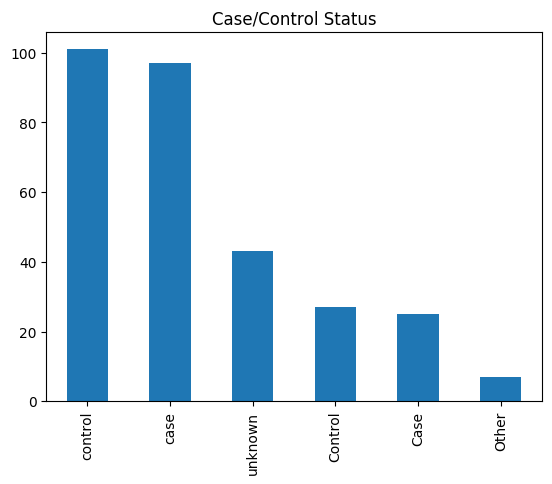

In [14]:
copd['Case/control'].value_counts().plot(kind='bar')
plt.title('Case/Control Status')
plt.show()

In [ ]:
files = os.listdir("/fs5/p_masi/krishar1/COPDGENE/new")